In [3]:
from scipy.stats import binom

# Ищем значения распределения p-value которых равен 0.025 и 0.975
bin_thr_l, bin_thr_r = binom.ppf(0.025, 1000, 0.1), binom.ppf(0.975, 1000, 0.1)

# Это пороги распределения, где сумма p-value слева и справа от которых равен 0.5
print(bin_thr_l, bin_thr_r)

# Ищем p-value соответствующий 87 и 113 в биномиальном распределении
bin_p_l = binom.cdf(87, 1000, 0.1)
bin_p_r = 1 - binom.cdf(113, 1000, 0.1)

bin_p_l + bin_p_r

82.0 119.0


0.17122792598236153

In [199]:
from statsmodels.stats.proportion import proportion_confint

lower, upper = proportion_confint(count=113, nobs=1000, alpha=0.05, method='normal')
lower * 1000, upper * 1000

(93.37773562870501, 132.62226437129502)

In [1]:
from statsmodels.stats.proportion import binom_test

binom_test(count=113, nobs=1000, prop=0.1, alternative='two-sided')

0.17051384223689403

In [ ]:
from statsmodels.stats.proportion import binom_test

binom_test(count=113, nobs=1000, prop=0.1, alternative='two-sided')

In [5]:
from statsmodels.stats.proportion import proportions_ztest
proportions_ztest(count=[113,113], nobs=[500,600])

(1.5395869556143262, 0.12366106711358926)

In [201]:
from scipy.stats import binomtest

binomtest(k=113, n=1000, p=0.1, alternative='two-sided').pvalue

0.17051384223689403

In [202]:
from scipy.stats import norm
import numpy as np

p = 113 / 1000
p0 = 0.1
z_n = (p - p0) / np.sqrt(p0 * (1 - p0) / 1000)
# z_n = (p - p0) / np.sqrt(p0 * (1 - p0) / 1000) - вот эта функция используется в proportions_ztest

print('z -', z_n)

left_tail_p = norm(loc=0, scale=1).cdf(-np.abs(z_n))
right_tail_p = 1 - norm(loc=0, scale=1).cdf(np.abs(z_n))

left_tail_p + right_tail_p

z - 1.3703203194062974


0.17058693287144155

Почему proportions_ztest делает это?
Использование выборочной пропорции для оценки стандартной ошибки (вместо гипотетической) дает более реалистичное значение, особенно при больших значениях n. Это позволяет учитывать реальное распределение данных и, как правило, слегка снижает значение z, что, в свою очередь, увеличивает p-значение.

In [203]:
from statsmodels.stats.proportion import proportions_ztest

proportions_ztest(count=113, nobs=1000, value=0.1, alternative='two-sided')

(1.298501096351254, 0.1941151998402999)

In [205]:
from scipy.stats import t

mu_prev = 16.5

N = 100
mu = 18.1
std = 8.2

t_n = (mu - mu_prev) / (std / np.sqrt(N))

2 * (1 - t(N - 1).cdf(np.abs(t_n)))

0.05385741608695005

In [228]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

data = fetch_california_housing(as_frame=True, return_X_y=True)
data = pd.concat([data[0], data[1]], axis=1)

data_u_30, data_o_30 = data[data['HouseAge'] <= 30], data[data['HouseAge'] > 30]

df_u_30, target_u_30 = data_u_30.drop(['MedHouseVal'], axis=1), data_u_30['MedHouseVal']
df_o_30, target_o_30 = data_o_30.drop(['MedHouseVal'], axis=1), data_o_30['MedHouseVal']

In [229]:
df_u_30['MedInc'].mean(), df_o_30['MedInc'].mean()

(4.026583580080753, 3.687664612954187)

In [237]:
df_u_30['MedInc'].var(), df_o_30['MedInc'].var()

(3.608046034222465, 3.549170237348847)

In [245]:
from scipy.stats import ttest_ind

ttest_ind(
    df_o_30['MedInc'],
    df_u_30['MedInc'],
    equal_var=False,
    alternative='two-sided'
)

# Для использования t-теста данные должны быть нормально распределены. Проверим это

TtestResult(statistic=-12.832590060636896, pvalue=1.5106543204708846e-37, df=20170.749108997465)

In [282]:
from scipy.stats import shapiro
import warnings

warnings.filterwarnings("ignore")

shapiro(df_u_30['MedInc']), shapiro(df_o_30['MedInc'])

# Тк p-value < 0.05, то мы отвергаем гипотезу, что данные распределены нормально

(ShapiroResult(statistic=0.921510311111813, pvalue=7.577799889225132e-60),
 ShapiroResult(statistic=0.8524968298978387, pvalue=4.890997255775511e-69))

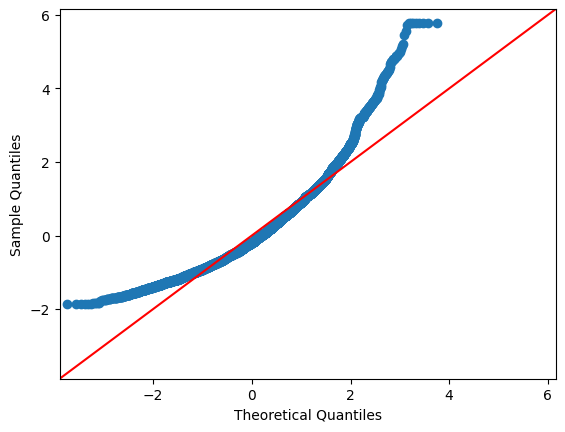

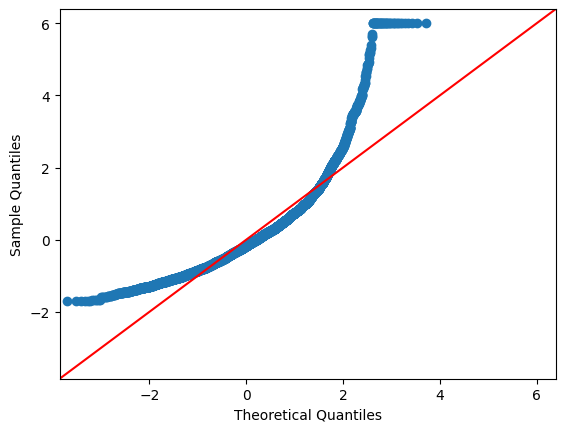

In [271]:
import statsmodels.api as sm
from scipy.stats import norm
import matplotlib.pyplot as plt

sm.qqplot(data=(df_u_30['MedInc'] - df_u_30['MedInc'].mean()) / df_u_30['MedInc'].std(),
          dist=norm,
          line='45')
plt.show()

sm.qqplot(data=(df_o_30['MedInc'] - df_o_30['MedInc'].mean()) / df_o_30['MedInc'].std(),
          dist=norm,
          line='45')
plt.show()

<Axes: xlabel='MedInc', ylabel='Count'>

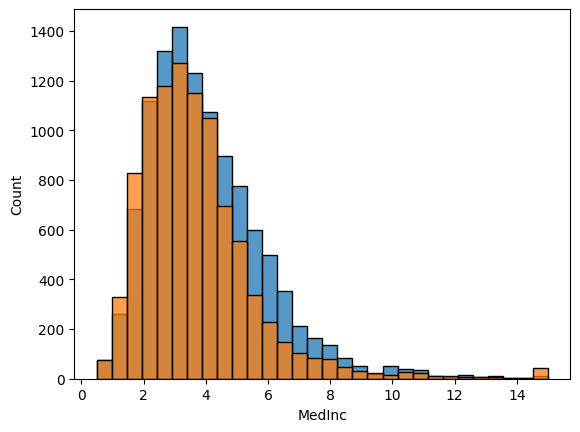

In [279]:
import seaborn as sns

sns.histplot(df_u_30['MedInc'], bins=30, kde=False, label='MedInc')
sns.histplot(df_o_30['MedInc'], bins=30, kde=False, label='MedInc')

### Логарифмируем!

In [284]:
from scipy.stats import ttest_ind

ttest_ind(
    np.log10(df_o_30['MedInc']),
    np.log10(df_u_30['MedInc']),
    equal_var=False,
    alternative='two-sided'
)

# Для использования t-теста данные должны быть нормально распределены. Проверим это

TtestResult(statistic=-14.181981825816631, pvalue=1.9629133448158867e-45, df=20087.905953093363)

In [289]:
from scipy.stats import shapiro
import warnings

warnings.filterwarnings("ignore")

shapiro(np.log10(df_u_30['MedInc'])), shapiro(np.log10(df_o_30['MedInc']))

# Тк p-value < 0.05, то мы отвергаем гипотезу, что данные распределены нормально

(ShapiroResult(statistic=0.996317491221013, pvalue=3.8137241337135045e-16),
 ShapiroResult(statistic=0.9950112737298399, pvalue=1.2474528088338214e-17))

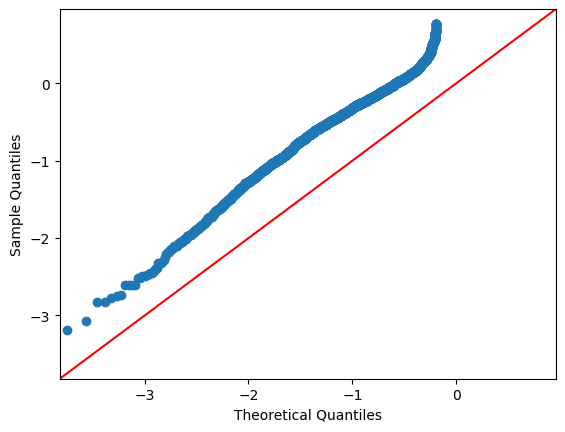

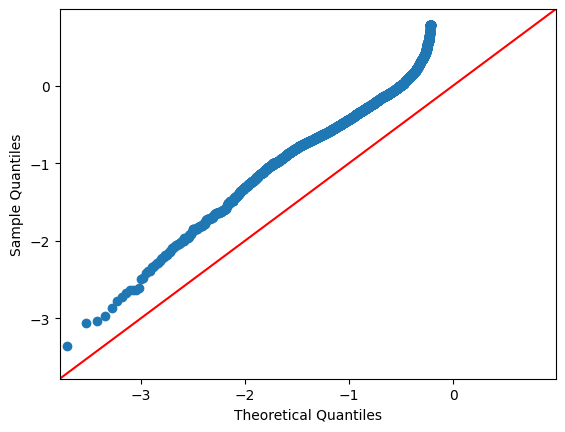

In [291]:
import statsmodels.api as sm
from scipy.stats import norm
import matplotlib.pyplot as plt

sm.qqplot(data=np.log10((df_u_30['MedInc'] - df_u_30['MedInc'].mean()) / df_u_30['MedInc'].std()),
          dist=norm,
          line='45')
plt.show()

sm.qqplot(data=np.log10((df_o_30['MedInc'] - df_o_30['MedInc'].mean()) / df_o_30['MedInc'].std()),
          dist=norm,
          line='45')
plt.show()

<Axes: xlabel='MedInc', ylabel='Count'>

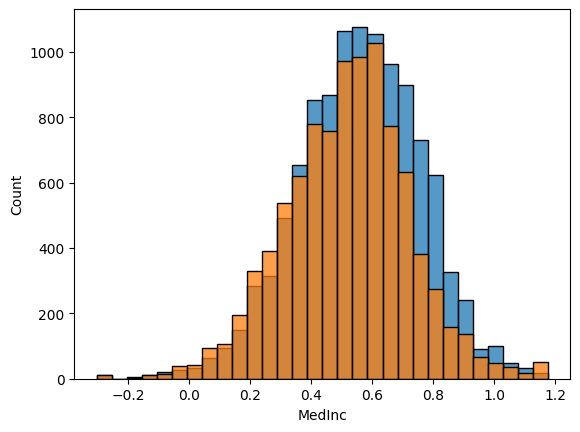

In [292]:
import seaborn as sns

sns.histplot(np.log10(df_u_30['MedInc']), bins=30, kde=False, label='MedInc')
sns.histplot(np.log10(df_o_30['MedInc']), bins=30, kde=False, label='MedInc')